# **Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Read csv file
df = pd.read_excel('/content/Main_tweet_data.xlsx')

In [3]:
print(df)

                                                    Text               ID
0      Call up that time machine and warn your father...         lSheeksl
1      @WArthurJ1 @KristanHawkins Who is forcing you ...       united6059
2      im inspired by kleo's tweets from last night b...      jewishdelly
3      WHAT hAPPENS DURING THE ABORTION PROCESS?\n2nd...     Girl33French
4      @fight4women @PickleMrs @BobDolan111 @OzGoofyP...     JerryRBarton
...                                                  ...              ...
11339  SB8/15 Holmes listens carefully to Helen's sto...  holmestwtholmes
11340  @iHATESNKRS @You_AIO Miami night 8s going for ...     Tampasneaker
11341  This is very interesting. "Accelerates the sun...     k_mosbrucker
11342  The Triple-B, Your Lordship. (40 Photos) ・・・・ ...  helen_sublett15
11343  @AllekVeloso @gatocomcancer1 @Jack_SB8 @Pessoa...   corote_de_odio

[11344 rows x 2 columns]


In [4]:
corpus = np.array(df['Text']) #convert from Dataframe to array
corpus = corpus.ravel() #convert from multi-dimensional array to 1 dimension
corpus

array(['Call up that time machine and warn your father to take your mom to the abortion center when she is pregnant with you https://t.co/gxGoleVKOY',
       '@WArthurJ1 @KristanHawkins Who is forcing you to have an abortion?',
       'im inspired by kleo\'s tweets from last night but the "keep abortion rare" messaging just further portrays abortion as some bad thing',
       ...,
       'This is very interesting. "Accelerates the sunset date for the tax credit for the conversion of alternative fuel vehicles." https://t.co/ylNrpMX5E9',
       'The Triple-B, Your Lordship. (40 Photos) ・・・・ https://t.co/tRaJllwwbu',
       '@AllekVeloso @gatocomcancer1 @Jack_SB8 @Pessoas1QI real https://t.co/vPOCQv8Gpc'],
      dtype=object)

In [5]:
# Remove @tags
for i in range(0,len(corpus)):
    corpus[i] = re.sub(r'@[A-Za-z0-9]+','',str(corpus[i]))

In [6]:
corpus[:10]

array(['Call up that time machine and warn your father to take your mom to the abortion center when she is pregnant with you https://t.co/gxGoleVKOY',
       '  Who is forcing you to have an abortion?',
       'im inspired by kleo\'s tweets from last night but the "keep abortion rare" messaging just further portrays abortion as some bad thing',
       'WHAT hAPPENS DURING THE ABORTION PROCESS?\n2nd Trimester Surgical Abortion: Dilation and Evacuation (D &amp; E) https://t.co/v6s5KkPFG2 via ',
       '        _chels _house          _RaySmith    Wrong Abortion kills a baby that will never be born ever . Lying want ease your conscience.',
       'Why are bullshit anti abortion billboards everywhere?? They literally aren・E\x80・Et truthful and they are meant to fear monger?? \n\nIn my dream world we would all be lizards. Everybody would move in silence and with purpose. Honestly ideal',
       "Didn't you vote on genocide denial?\nThey have forced abortion, that isn't a feminist cause to yo

In [7]:
# Remove urls
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [8]:
corpus = [remove_url(Text) for Text in corpus]
corpus = np.array(corpus)
corpus = corpus.ravel()
corpus[:10]

array(['Call up that time machine and warn your father to take your mom to the abortion center when she is pregnant with you',
       'Who is forcing you to have an abortion',
       'im inspired by kleos tweets from last night but the keep abortion rare messaging just further portrays abortion as some bad thing',
       'WHAT hAPPENS DURING THE ABORTION PROCESS2nd Trimester Surgical Abortion Dilation and Evacuation D amp E via',
       'chels house RaySmith Wrong Abortion kills a baby that will never be born ever Lying want ease your conscience',
       'Why are bullshit anti abortion billboards everywhere They literally arenEEt truthful and they are meant to fear monger In my dream world we would all be lizards Everybody would move in silence and with purpose Honestly ideal',
       'Didnt you vote on genocide denialThey have forced abortion that isnt a feminist cause to youThen I dont like these women and their mulesIm always suspicious when they want to single out the women and sho

In [9]:
# Normalize corpus
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [10]:
def normalize_document (doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) # re.I ignore case sensitive, ASCII-only matching
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create documenr from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [11]:
normalize_corpus = np.vectorize(normalize_document)

In [12]:
normalized_corpus = normalize_corpus(corpus)
normalized_corpus[:10]

array(['call time machine warn father take mom abortion center pregnant',
       'forcing abortion',
       'im inspired kleos tweets last night keep abortion rare messaging portrays abortion bad thing',
       'happens abortion processnd trimester surgical abortion dilation evacuation amp e via',
       'chels house raysmith wrong abortion kills baby never born ever lying want ease conscience',
       'bullshit anti abortion billboards everywhere literally areneet truthful meant fear monger dream world would lizards everybody would move silence purpose honestly ideal',
       'didnt vote genocide denialthey forced abortion isnt feminist cause youthen dont like women mulesim always suspicious want single women show youthese women worthless',
       'lgbtq want punish women sex suspect latter abortion illegal still occurred',
       'consult doctorsabortion rarely eechoiceee itees choice advocate foreeeeee',
       'lgbtq since making abortion illegal stopped support easy access freelow

In [13]:
normalized_df = pd.DataFrame({'Text': normalized_corpus, 'ID': df['ID']})
normalized_df.head(11)

Text             ID
0   call time machine warn father take mom abortio...       lSheeksl
1                                    forcing abortion     united6059
2   im inspired kleos tweets last night keep abort...    jewishdelly
3   happens abortion processnd trimester surgical ...   Girl33French
4   chels house raysmith wrong abortion kills baby...   JerryRBarton
5   bullshit anti abortion billboards everywhere l...       kirs9407
6   didnt vote genocide denialthey forced abortion...  Angel20140238
7   lgbtq want punish women sex suspect latter abo...     united6059
8   consult doctorsabortion rarely eechoiceee itee...   LauraWhitt32
9   lgbtq since making abortion illegal stopped su...     united6059
10     really dont care abortion rare want accessible    jewishdelly

# **Sentiment Analysis using VADER**

---


In most NLP tasks we need to apply data cleansing first. This should be avoided when we run sentiment analysis. Notice that VADER:

- It is case sensitive.
- The sentence This is great has a different score than the sentence This is GREAT.
- Punctuation matters.
- The exclamation marks for example have a positive score
- The emojis have also a score and actually very strong sentiments.

Try the <3, :) , :p and :( Words after @ and # have a neutral score.

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
#Sentiment Analysis on corpus (NOT normalized_df)
corpus = pd.DataFrame({'ID': df['ID'], 'Text': corpus})
corpus['neg'] = corpus['Text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
corpus['neu'] = corpus['Text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
corpus['pos'] = corpus['Text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
corpus['compound'] = corpus['Text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
corpus

ID  ... compound
0             lSheeksl  ...  -0.1027
1           united6059  ...   0.0000
2          jewishdelly  ...  -0.5647
3         Girl33French  ...   0.0000
4         JerryRBarton  ...  -0.8020
...                ...  ...      ...
11339  holmestwtholmes  ...  -0.1280
11340     Tampasneaker  ...  -0.6486
11341     k_mosbrucker  ...   0.6801
11342  helen_sublett15  ...   0.0000
11343   corote_de_odio  ...   0.0000

[11344 rows x 6 columns]

In [16]:
#Get VADER labels based on compound scores
conditions = [
    (corpus['compound'] >= 0.05),
    (corpus['compound'] < 0.05) & (corpus['compound'] > -0.05),
    (corpus['compound'] <= -0.05)
     ]

labels = ['positive','neutral','negative']

corpus['vader_labels'] = np.select(conditions,labels)
vader = corpus[['ID','Text','vader_labels']]
vader

ID  ... vader_labels
0             lSheeksl  ...     negative
1           united6059  ...      neutral
2          jewishdelly  ...     negative
3         Girl33French  ...      neutral
4         JerryRBarton  ...     negative
...                ...  ...          ...
11339  holmestwtholmes  ...     negative
11340     Tampasneaker  ...     negative
11341     k_mosbrucker  ...     positive
11342  helen_sublett15  ...      neutral
11343   corote_de_odio  ...      neutral

[11344 rows x 3 columns]

In [17]:
total_positive = 0
total_neutral = 0
total_negative = 0

for i in vader['vader_labels']:
  if i == 'positive':
    total_positive += 1
  elif i == 'neutral':
    total_neutral += 1
  else:
    total_negative += 1

print('VADER results:')
print('Total Positive Tweets:', total_positive)
print('Total Neutral Tweets:', total_neutral)
print('Total Negative Tweets:', total_negative)

VADER results:
Total Positive Tweets: 4537
Total Neutral Tweets: 2380
Total Negative Tweets: 4427


Text(0.5, 1.0, 'Number of Positive, Neutral, and Negative Tweets')

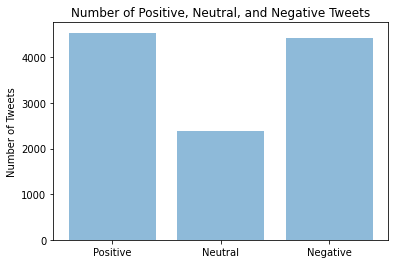

In [18]:
import matplotlib.pyplot as plt
import numpy as np

objects = ['Positive', 'Neutral', 'Negative']
y_pos = np.arange (len(objects))

plt.bar(y_pos,[total_positive, total_neutral,total_negative],alpha=0.5);
plt.xticks(y_pos,objects)
plt.ylabel("Number of Tweets")
plt.title("Number of Positive, Neutral, and Negative Tweets")

# Polarity

In [19]:
import textblob
from textblob import TextBlob

list_tweets = corpus.Text
len(list_tweets)

11344

In [20]:
polarity = 0
polaritylist=[]
total_pos=0
total_neg=0

for tweet in list_tweets:
  sent = TextBlob(tweet).sentiment.polarity
  polarity =+ sent
  polaritylist.append(sent)
  if sent > 0:
    total_pos +=1
  else:
    total_neg+=1
    
print ("overall polarity", polarity)
print ("total sentences sentiment", "positive:", total_pos, ", %positive:",round(total_pos*100/(total_neg+total_pos),2),", negative:", total_neg, ", %negative:",round(total_neg*100/(total_neg+total_pos),2))

overall polarity 0.2
total sentences sentiment positive: 5452 , %positive: 48.06 , negative: 5892 , %negative: 51.94


(array([  53.,   93.,  384.,  674., 1630., 5719., 1889.,  696.,  115.,
          91.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

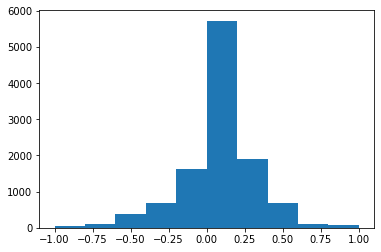

In [21]:
plt.hist(polaritylist)

In [22]:
import statistics

In [23]:
a = pd.DataFrame(polaritylist)

In [24]:
a.describe()

0
count  11344.000000
mean       0.065035
std        0.253463
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.200000
max        1.000000